# Gaussian naive Bayes classifier for Iris data

## 1. Import thư viện cần thiết

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

## 2. Đọc dữ liệu từ Iris.csv

In [3]:
iris = pd.read_csv("Iris.csv")

## 3. Phân tích dữ liệu

In [4]:
iris.shape

(150, 6)

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## 3. Trực quan hóa dữ liệu

Text(0, 0.5, '')

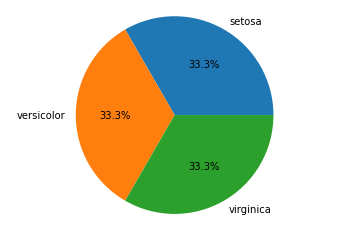

In [11]:
# Vẽ để xem tỉ lệ setosa/versicolor/virginica
fig, ax = plt.subplots(1, 1)
ax.pie(iris.Species.value_counts(), autopct='%1.1f%%', labels=['setosa','versicolor', 'virginica'])
plt.axis('equal')
plt.ylabel('')

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


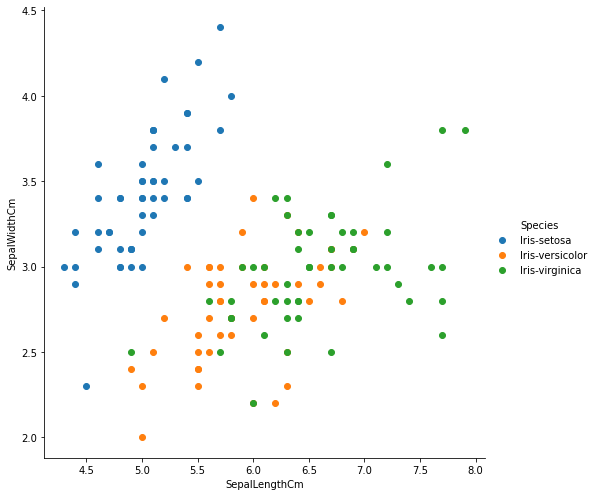

In [12]:
# Vẽ đồ thị phân tán của chiều dài đài hoa so với chiều rộng đài hoa
sns.FacetGrid(iris, hue="Species", size=7).map(plt.scatter, "SepalLengthCm", "SepalWidthCm", ).add_legend()

## 3. Xây dựng mô hình phân lớp GaussianNB

In [13]:
# Chuyển đổi tên loài tượng trưng thành số phù hợp với bộ phân loại Bayes
le = LabelEncoder()
le.fit(iris['Species'])
iris['Species'] = le.transform(iris['Species'])

# Chia tập dữ liệu thành 2/3 dữ liệu training và 1/3 dữ liệu test
trainSet, testSet = train_test_split(iris, test_size = 0.33)

In [14]:
trainSet.shape

(100, 6)

In [15]:
trainSet.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,2
142,143,5.8,2.7,5.1,1.9,2
100,101,6.3,3.3,6.0,2.5,2
29,30,4.7,3.2,1.6,0.2,0
120,121,6.9,3.2,5.7,2.3,2


In [16]:
testSet.shape

(50, 6)

In [17]:
testSet.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
97,98,6.2,2.9,4.3,1.3,1
59,60,5.2,2.7,3.9,1.4,1
139,140,6.9,3.1,5.4,2.1,2
79,80,5.7,2.6,3.5,1.0,1
86,87,6.7,3.1,4.7,1.5,1


In [18]:
# Định dạng dữ liệu và các giá trị mong đợi cho SKLearn
trainData = pd.DataFrame.to_numpy(trainSet[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
trainTarget = pd.DataFrame.to_numpy(trainSet[['Species']]).ravel()
testData = pd.DataFrame.to_numpy(testSet[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
testTarget = pd.DataFrame.to_numpy(testSet[['Species']]).ravel()

classifier = GaussianNB()
classifier.fit(trainData, trainTarget)

GaussianNB()

## 4. Đánh giá

In [19]:
predictedValues = classifier.predict(testData)

nErrors = (testTarget != predictedValues).sum()
accuracy = 1.0 - nErrors / testTarget.shape[0]
print("Accuracy: ", accuracy)


Accuracy:  0.96
